# Analysis of Exactly How Lazy I Am

Data is a CSV titled _clocktime.csv_ 

## Data Dictionary

---

| Data Point | Definition                     |
|:---------- |:------------------------------ |
| date       | The date of the record         |
| Lhour      | Hours of productive time       |
| Lmin       | Minutes of productive time     |
| Lsec       | Seconds of productive time     |
| Rhour      | Hours of Non-productive time   |
| Rmin       | Minutes of Non-productive time |
| Rsec       | Seconds of Non-productive time |

---

| Productive Time | Non-Productive Time |
| --------------- | ------------------- |
| Working         | Procrastinating     |
| Studying        | Off-Task            |
| On-Task         | Leisure Time        |

---

## Import Necesaary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Begin Data Import and Munging


`date` is stored as a string and needs to be parsed for a time series
All other fields need to be converted to seconds for aggregation and proportion comparison

In [2]:
# Import the data into a data frame with pandas
df = pd.read_csv('clocktime.csv')

In [3]:
# Preview of our data
df.head(10)

,date,Lhour,Lmin,Lsec,Rhour,Rmin,Rsec
0,11/9/20,1,44,32,14,52,103
1,11/8/20,1,0,0,4,28,53
2,11/7/20,6,40,57,9,59,59
3,11/6/20,3,22,3,11,12,31
4,11/5/20,4,36,31,12,53,52
5,11/4/20,4,6,26,9,59,59
6,11/3/20,4,15,2,9,59,59
7,11/2/20,2,38,13,3,13,27
8,11/13/20,2,5,50,9,25,31
9,11/11/20,1,18,4,9,45,15


In [4]:
# Get info about the data frame fields
# This is a method so parens are needed
# Object types are usually strings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    17 non-null     object
 1   Lhour   17 non-null     int64 
 2   Lmin    17 non-null     int64 
 3   Lsec    17 non-null     int64 
 4   Rhour   17 non-null     int64 
 5   Rmin    17 non-null     int64 
 6   Rsec    17 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.1+ KB


In [5]:
# Make 'date' into a datetime instead of a string
df["date"] = pd.to_datetime(df["date"])

# Convert Hours and Minutes to seconds for comparison
leftTimes = (df["Lsec"],df["Lmin"] * 60, df["Lhour"] * 3600)
rightTimes = (df["Rsec"],df["Rmin"] * 60, df["Rhour"] * 3600)

df["Lsec"] = sum(leftTimes)
df["Rsec"] = sum(rightTimes)

total = (df["Lsec"], df["Rsec"])
df["total"] = sum(total)

In [6]:
# Overwrite data frame
df = df[['date','Lsec','Rsec','total']]

In [7]:
# Get a proportion percentage data points for comparison
df['Lpct'] = round(df['Lsec'] / df['total'] * 100, 0)
df['Rpct'] = round(df['Rsec'] / df['total'] * 100, 0)

## Begin Data Visualization

This utilizes the `matplotlib.pyplot` module

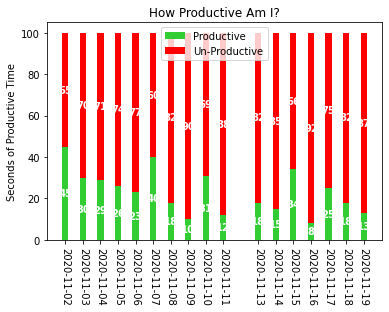

<AxesSubplot:>

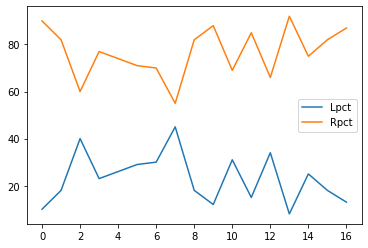

In [8]:
ind = df['date']    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, df['Lpct'], width, color = 'limegreen')
p2 = plt.bar(ind, df['Rpct'], width, color = 'red', bottom=df['Lpct'])

plt.ylabel('Seconds of Productive Time')
plt.title('How Productive Am I?')
plt.xticks(ind, rotation=270)
plt.legend((p1[0], p2[0]), ('Productive', 'Un-Productive'), loc = "best")

# Data Labels for stacked bar
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=10, fontweight="bold")


plt.show()

# Line Chart
df[['Lpct','Rpct']].plot()